<a href="https://colab.research.google.com/github/crater-creator/Android_Kotlin/blob/main/RBP_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
batch_size = 128
num_classes = 10
epochs = 100

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
len(y_train[0])

10

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint('digits_model.h5', save_best_only=True)
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                       patience=5)


In [ ]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    epochs=epochs, batch_size=batch_size,
                    callbacks=[monitor_val_lose,modelCheckpoint])

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0649 - accuracy: 0.9807


[0.06493189185857773, 0.9807000160217285]

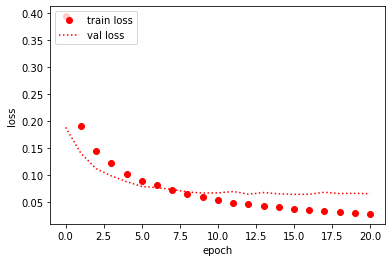

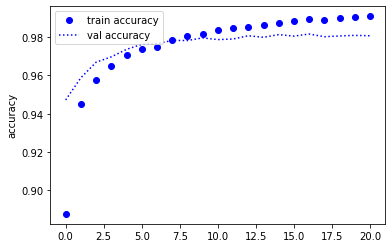

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r:', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'bo', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'b:', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
import numpy as np
selected_digit = 0

result = model.predict(np.array([x_test[selected_digit]]))
result_number = np.argmax(result)
y_test_digit = y_test[selected_digit]
y_test_number = np.argmax(y_test_digit)
print(result, result_number)
print(y_test_digit, y_test_number)

[[2.0097671e-07 3.9690792e-11 3.0432265e-08 8.8680381e-06 6.7298414e-14
  7.9077349e-09 8.0240769e-15 9.9998820e-01 5.5534497e-07 2.1822946e-06]] 7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 7


[2.0097671e-07, 3.9690792e-11, 3.0432265e-08, 8.868038e-06, 6.7298414e-14, 7.907735e-09, 8.024077e-15, 0.9999882, 5.5534497e-07, 2.1822946e-06]


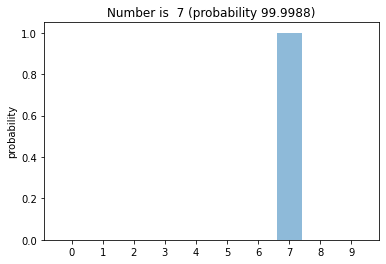

In [ ]:
digits = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
y_pos = np.arange(len(digits))
performance = [ val for val in result[0]]
print(performance)
result_probability = performance[result_number]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, digits)
plt.ylabel('probability')
plt.title('Number is %2i (probability %7.4f)' % (result_number, result_probability*100))

plt.show()

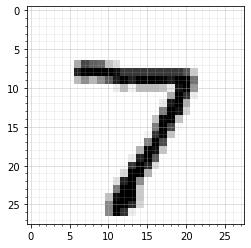

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


major_ticks = np.arange(0, 29, 5)
minor_ticks = np.arange(0, 29, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)


ax.grid(which='both')


ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.imshow(x_test[selected_digit], cmap=plt.cm.binary)

plt.show()

In [ ]:
print(x_test[selected_digit])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

직접 쓴 손글씨 인식

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

width: 523 pixels
height: 184 pixels
channels: 3


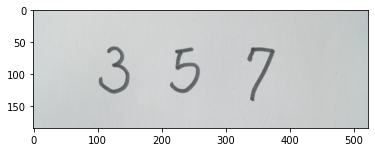

In [ ]:
frame = 'digits_357.jpg'

img = cv2.imread(frame)
#plt.figure(figsize=(10,10))
plt.imshow(img);
print("width: {} pixels".format(img.shape[1]))
print("height: {} pixels".format(img.shape[0]))
print("channels: {}".format(img.shape[2]))

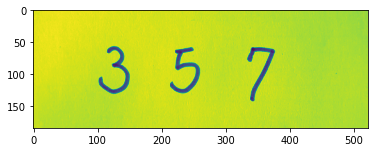

In [ ]:
# hsv transform - value = gray image
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue, saturation, value = cv2.split(hsv)
plt.imshow(value)

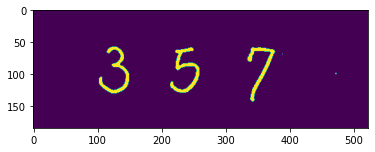

In [ ]:
# 외곽선을 선명하게 만드는 작업
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# topHat 
topHat = cv2.morphologyEx(value, cv2.MORPH_TOPHAT, kernel)


# blackHat
blackHat = cv2.morphologyEx(value, cv2.MORPH_BLACKHAT, kernel)


# add and subtract between morphological operations
add = cv2.add(value, topHat)
subtract = cv2.subtract(add, blackHat)

# blur
blur = cv2.GaussianBlur(subtract, (5, 5), 0)

# thresholding
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 19, 9)
plt.imshow(thresh)

In [ ]:
cv2MajorVersion = cv2.__version__.split(".")[0]
print('openCV version : ', cv2MajorVersion)

openCV version :  4


In [ ]:
if int(cv2MajorVersion) >= 4:
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
else:
    imageContours, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

334 378 58 143
214 260 58 129
103 150 57 130


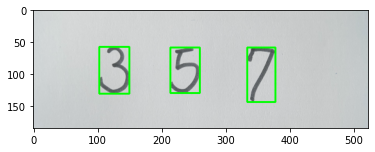

In [ ]:
img_digits = []
img_origin = img.copy()
margin = 10

# loop to check if any (possible) contour is found
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  # Ignore if image is too small
  if w * h < 100: continue
  #Y and X [y-margin:y+h+margin, x-margin:x+w+margin]
  img_digits.append(img_origin[y-margin:y+h+margin, x-margin:x+w+margin])
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
  print(x,  x+w, y, y+h)
plt.imshow(img)

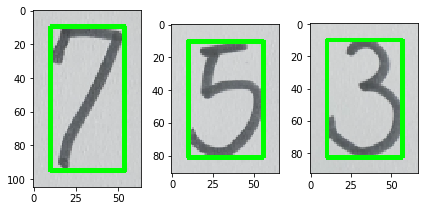

In [ ]:
for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    plt.imshow(img_digits[i], cmap='Greys', interpolation='nearest')
plt.tight_layout()
plt.show() 

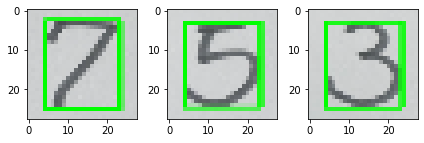

In [ ]:
SZ = 28

for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    plt.imshow(cv2.resize(img_digits[i], (SZ, SZ)), cmap='Greys', interpolation='nearest')
plt.tight_layout()
plt.show() 

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('digits_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


[2.5641505e-08, 3.09489e-05, 0.104734994, 0.8950121, 7.9459876e-13, 4.8061855e-05, 4.921317e-08, 0.00013405694, 3.9863677e-05, 5.898524e-11]
[0.0038563588, 0.00031026118, 7.739394e-05, 0.012369499, 8.2457485e-11, 0.9603142, 0.00039375896, 0.02263206, 2.0177135e-05, 2.6216248e-05]
[3.076589e-05, 0.00023086587, 0.01882348, 0.9684616, 8.4439684e-11, 0.010405629, 5.615667e-07, 0.001080352, 0.00095567503, 1.108134e-05]


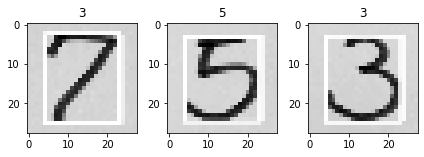

In [ ]:
SZ = 28

for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    num = cv2.resize(img_digits[i], (SZ,SZ))[:,:,1]
    num = 255 - num #Reverse 
    num = num.astype('float32') / 255.
    plt.imshow(num, cmap='Greys', interpolation='nearest');
    result = model.predict(np.array([num]))
    result_number = np.argmax(result)
    plt.title(result_number)
    performance = [ val for val in result[0]]
    print(performance)
plt.tight_layout()
plt.show()